In [2]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv('./data/train.csv')
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
# Change column names to lower letter and replace ' ' with '_'
train.columns = train.columns.str.lower().str.replace(' ', '_')

In [5]:
# converting the boolean or True,False to 0/1
for col in ['cryosleep', 'vip', 'transported']:
    train[col] = train[col].map({True:1, False:0})
train.sample(5)

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported
7155,7633_01,NaN,0.0,G/1224/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,847.0,1.0,Dannie Hebernandry,0
5365,5730_01,Earth,0.0,F/1187/P,TRAPPIST-1e,25.0,0.0,2029.0,1.0,0.0,0.0,121.0,Karlen Moodman,0
325,0365_01,Earth,0.0,G/51/S,55 Cancri e,NaN,0.0,0.0,0.0,0.0,685.0,21.0,Dandra Jacostaney,0
999,1063_01,NaN,0.0,B/38/P,TRAPPIST-1e,38.0,0.0,0.0,3262.0,0.0,295.0,1374.0,Markar Ingwhed,1
7335,7849_01,Earth,0.0,G/1271/S,TRAPPIST-1e,22.0,0.0,558.0,63.0,0.0,0.0,0.0,Tonnie Ewisentley,0


In [6]:
# extract cat and num columns:
cat_cols = train.select_dtypes(include=['object']).columns.to_list()
num_cols = train.select_dtypes(exclude=['object']).columns.to_list()
print(cat_cols)
print(num_cols)

['passengerid', 'homeplanet', 'cabin', 'destination', 'name']
['cryosleep', 'age', 'vip', 'roomservice', 'foodcourt', 'shoppingmall', 'spa', 'vrdeck', 'transported']


In [7]:
# converting dataframe string content to lower case and replcaing ' ' with '_'
for col in cat_cols:
    train[col] = train[col].str.lower().str.replace(' ', '_')
train.sample(5)

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported
4372,4654_01,europa,1.0,e/291/p,trappist-1e,20.0,0.0,0.0,0.0,0.0,0.0,0.0,hamelik_witeronfus,1
6713,7085_01,mars,0.0,f/1466/p,trappist-1e,62.0,0.0,453.0,1.0,1911.0,0.0,0.0,stech_pread,0
2511,2697_01,mars,0.0,d/91/s,trappist-1e,27.0,NaN,1893.0,487.0,4.0,0.0,0.0,pank_pimne,0
7900,8438_01,mars,0.0,f/1624/s,trappist-1e,32.0,0.0,725.0,0.0,1641.0,0.0,0.0,kohs_prist,0
4436,4714_01,earth,1.0,g/765/p,trappist-1e,24.0,0.0,0.0,0.0,0.0,0.0,0.0,roydo_mayson,0


In [8]:
# list total missing values in each columns
train.isnull().sum()

passengerid       0
homeplanet      201
cryosleep       217
cabin           199
destination     182
age             179
vip             203
roomservice     181
foodcourt       183
shoppingmall    208
spa             183
vrdeck          188
name            200
transported       0
dtype: int64

In [9]:
# display data if missing values are more than in 5 columns:
train[train.isnull().sum(axis=1) >= 5]

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported


In [15]:
# filling the missing values with mean for num_cols and mode for cat cols
for col in num_cols:
    train[col] = train[col].fillna(train[col].mean())
for col in cat_cols:
    train[col] = train[col].fillna(train[col].mode()[0])
train.isnull().sum()

passengerid     0
homeplanet      0
cryosleep       0
cabin           0
destination     0
age             0
vip             0
roomservice     0
foodcourt       0
shoppingmall    0
spa             0
vrdeck          0
name            0
transported     0
dtype: int64

/var/folders/_2/sdzrwz45427b53fcr8rggplm0000gq/T/ipykernel_647/2765761428.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True)


<AxesSubplot:>

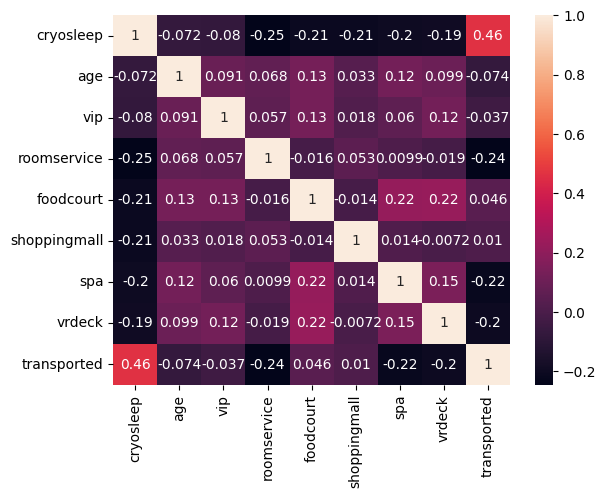

In [19]:
import seaborn as sns

sns.heatmap(train.corr(), annot=True)

In [21]:
train.describe()

,cryosleep,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,transported
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,0.358306,28.827930,0.023439,224.687617,458.077203,173.729169,311.138778,304.854791,0.503624
std,0.473507,14.339054,0.149526,659.739364,1594.434978,597.417440,1124.675871,1133.259049,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,37.000000,0.000000,78.000000,118.000000,45.000000,89.000000,71.000000,1.000000
max,1.000000,79.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


In [23]:
train.destination.value_counts()

trappist-1e      6097
55_cancri_e      1800
pso_j318.5-22     796
Name: destination, dtype: int64